# Color Detection and Differentiation

### Importing Libraries

In [129]:
from collections import Counter 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from matplotlib import colors
import cv2

### Converting RGB to HEX 

In [130]:
def rgb_to_hex(color):
    hex_color = "#"
    for i in color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [131]:
rgb_to_hex([255, 0, 0])

'#ff0000'

### Reading and reshaping images

In [133]:
img_1 = "img/aesthetic.jpg"
raw_img = cv2.imread(img_1)
raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)

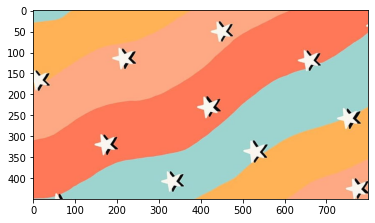

In [134]:
plt.imshow(raw_img)

In [135]:
raw_img.shape

(450, 800, 3)

In [136]:
img = cv2.resize(raw_img, (900, 600), interpolation=cv2.INTER_AREA)
img.shape

(600, 900, 3)

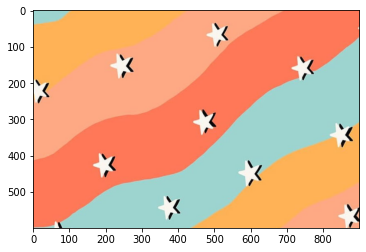

In [137]:
plt.imshow(img)

In [138]:
img_final = img.reshape(img.shape[0] * img.shape[1], 3)
img_final.shape

(540000, 3)

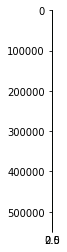

In [139]:
plt.imshow(img_final)

In [140]:
img_final

array([[157, 212, 207],
       [157, 212, 207],
       [157, 212, 207],
       ...,
       [253, 169, 132],
       [253, 169, 132],
       [253, 169, 132]], dtype=uint8)

### Kmeans Algorithm from Scratch

In [141]:
class Kmeans_from_scratch:
    def __init__(self, k, max_iter = 300, n_init = 10, random_state=0):
        self.k = k
        self.max_iter = max_iter
        self.n_init = n_init
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        
    def fit(self, X):
        self.centroids = self.init_centroids(X)
        self.labels = np.zeros(X.shape[0])
        for i in range(self.n_init):
            self.labels = self.assign_labels(X)
            self.centroids = self.update_centroids(X)

        num = 1
        while num < self.max_iter:
            centroids_old = self.centroids
            self.labels = self.assign_labels(X)
            self.centroids = self.update_centroids(X)
            if np.array_equal(centroids_old, self.centroids):
                break
            num += 1

        return self
    
    def init_centroids(self, X):
        centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            centroids[i] = X[np.random.randint(X.shape[0])]
        return centroids
    
    def assign_labels(self, X):
        labels = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X[i] - self.centroids, axis=1)
            labels[i] = np.argmin(distances)
        return labels
    
    def update_centroids(self, X):
        new_centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            new_centroids[i] = np.mean(X[self.labels == i], axis=0)
        return new_centroids

### Implementing Kmeans - sklearn

In [142]:
num_colors = int(input("Enter number of colors: "))

In [143]:
clf = KMeans(n_clusters=num_colors)
color_label = clf.fit_predict(img_final)
color_label.shape
center_colors = clf.cluster_centers_

In [145]:
clf_my = Kmeans_from_scratch(num_colors)
clf_my.fit(img_final)

/home/ayushabrol/Desktop/Color Recognition/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ayushabrol/Desktop/Color Recognition/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [146]:
color_label_my = clf_my.labels
center_colors_my = clf_my.centroids

In [147]:
color_label

array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

In [148]:
# Convert the labels from float to int
color_label_my = color_label_my.astype(int)
color_label_my

array([0, 0, 0, ..., 0, 0, 0])

In [149]:
len(color_label)

540000

In [150]:
center_colors

array([[254.63492156, 177.97225695,  86.47896741],
       [166.59098074, 214.70306988, 209.2668045 ],
       [253.72996555, 120.25866033,  88.39724969],
       [ 28.98570653,  21.90790664,  20.11796635],
       [252.32688494, 169.40686242, 132.42946822]])

In [151]:
center_colors_my

array([[227.64438519, 166.74354259, 129.8382    ],
       [         nan,          nan,          nan],
       [         nan,          nan,          nan],
       [         nan,          nan,          nan],
       [         nan,          nan,          nan]])

In [152]:
# Make color Counter group according to the center colors
counts = Counter(color_label)
counts

Counter({1: 146553, 4: 118997, 0: 103197, 2: 165726, 3: 5527})

In [153]:
counts_my = Counter(color_label_my)
counts_my

Counter({0: 540000})

In [154]:
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
hex_colors 

['#fca984', '#1c1514', '#a6d6d1', '#feb156', '#fd7858']

In [155]:
ordered_colors_my = [center_colors_my[i] for i in (counts_my.keys())]
hex_colors_my = [rgb_to_hex(ordered_colors_my[i]) for i in (counts_my.keys())]
hex_colors_my

['#e3a681']

In [156]:
ordered_colors

[array([166.59098074, 214.70306988, 209.2668045 ]),
 array([252.32688494, 169.40686242, 132.42946822]),
 array([254.63492156, 177.97225695,  86.47896741]),
 array([253.72996555, 120.25866033,  88.39724969]),
 array([28.98570653, 21.90790664, 20.11796635])]

In [157]:
ordered_colors_my

[array([227.64438519, 166.74354259, 129.8382    ])]

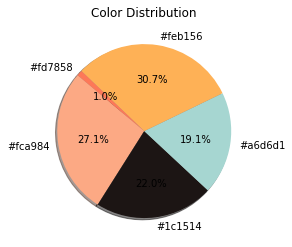

In [158]:
def show_colors_in_a_pie_chart(hex_colors, counts):
    plt.pie(counts.values(), labels=hex_colors, colors=hex_colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title("Color Distribution")
    plt.show()

show_colors_in_a_pie_chart(hex_colors, counts)

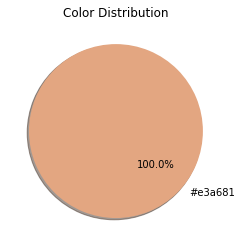

In [159]:
show_colors_in_a_pie_chart(hex_colors_my, counts_my)

Prominent color using sklearn:  #a6d6d1


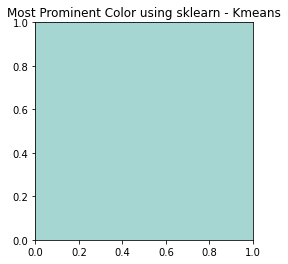

In [160]:
prominent_color = hex_colors[counts.most_common(1)[0][0]]
print("Prominent color using sklearn: ", prominent_color)

figure, axes = plt.subplots()
Drawing_colored_circle = plt.Circle(( 0.6 , 0.6 ), 1, color=prominent_color)
axes.set_aspect( 1 )
axes.add_artist( Drawing_colored_circle )
plt.title( 'Most Prominent Color using sklearn - Kmeans' )
plt.show()


Prominent color scratch:  #e3a681


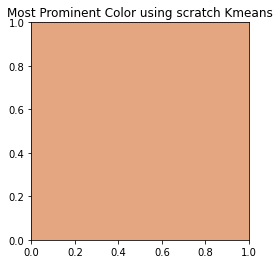

In [161]:
prominent_color_my = hex_colors_my[counts_my.most_common(1)[0][0]]
print("Prominent color scratch: ", prominent_color_my)

figure, axes = plt.subplots()
Drawing_colored_circle = plt.Circle(( 0.6 , 0.6 ), 1, color=prominent_color_my)
axes.set_aspect( 1 )
axes.add_artist( Drawing_colored_circle )
plt.title( 'Most Prominent Color using scratch Kmeans' )
plt.show()